In [59]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import norm

# **Introduction to AI in the Workforce: A Job Market Analysis**
This analysis delves into the "AI-Powered Job Market Insights" dataset, offering a comprehensive exploration of how artificial intelligence (AI) and automation are influencing the modern job market. The dataset provides a snapshot of job listings across various industries, highlighting factors such as AI adoption levels, automation risk, and salary ranges. By examining these elements, we aim to uncover key trends and insights into how AI is reshaping employment opportunities and job market dynamics.

**Objective**
The primary objective of this analysis is to identify and understand key patterns related to salaries, required skills, remote work, and job market trends influenced by AI. By employing various analytical techniques, we seek to reveal how AI adoption impacts compensation, skill requirements, and job growth, as well as how it correlates with the likelihood of remote work.

**Data Overview**
The dataset includes the following key features:

- Job_Title: The title of the job role.
- Industry: The industry in which the job is located.
- Company_Size: The size of the company offering the job.
- Location: The geographic location of the job.
- AI_Adoption_Level: The extent to which the company has adopted AI in its operations.
- Automation_Risk: The estimated risk of the job being automated within the next 10 years.
- Required_Skills: The key skills required for the job role.
- Salary_USD: The annual salary offered for the job in USD.
- Remote_Friendly: Indicates whether the job can be performed remotely.
- Job_Growth_Projection: The projected growth or decline of the job role over the next five years.

**Analysis Highlights**
- Distribution of Salaries Across Industries and AI Adoption Levels: A box plot will illustrate how salaries differ across various industries, segmented by AI adoption levels. This analysis will help identify high-paying industries and assess the impact of AI on compensation.
- Skill Frequency Analysis: A count plot will show the frequency of required skills, segmented by AI adoption levels. This will reveal which skills are more common in roles with high AI adoption.
- Correlation Matrix: A heatmap will explore the relationships between numerical features such as salary, AI adoption, automation risk, and job growth. This will uncover trends and correlations, such as whether higher AI adoption is linked to increased salaries or reduced automation risk.
- AI Adoption Level Impact on Remote Work: A heatmap will examine the relationship between AI adoption levels and the likelihood of a job being remote-friendly, exploring if AI adoption promotes remote work opportunities.
- Industry-Specific Salary Distribution: A focused box plot will analyze salary distributions within the Technology industry, segmented by AI adoption level and automation risk, providing deeper insights into compensation within this sector.
- Clustering Analysis: KMeans clustering will group similar job roles based on AI adoption level, automation risk, and salary, helping to identify patterns and categorize jobs with similar characteristics.
- Point-Biserial Correlation: An analysis of the point-biserial correlation will explore the relationship between AI adoption levels and the correlation between remote work and salary, revealing how AI adoption influences this dynamic.

By combining these analyses, this report aims to provide a thorough understanding of how AI is transforming the job market, offering valuable insights into compensation trends, skill demands, and employment opportunities in an AI-driven landscape.

In [60]:
job_Market= pd.read_csv(r"C:\Users\garet\Downloads\Gareth-ai_job_market_insights.csv")

# 1. Initial Data Inspection

In [4]:
job_Market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    int64  
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


In [5]:
job_Market.describe()

,Salary_USD,Remote_Friendly
count,500.000000,500.000000
mean,91222.390974,0.502000
std,20504.291453,0.500497
min,31969.526346,0.000000
25%,78511.514863,0.000000
50%,91998.195286,1.000000
75%,103971.282092,1.000000
max,155209.821614,1.000000


In [6]:
job_Market.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,1,Growth
1,Marketing Specialist,Tech0logy,Large,Singapore,Medium,High,Marketing,93792.562466,0,Decline
2,AI Researcher,Tech0logy,Large,Singapore,Medium,High,UX/UI Design,107170.263069,1,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,0,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,1,Decline


# 2. Checking for Missing Values

In [7]:
print("\nMissing Values:")
missing_values = job_Market.isnull().sum()
print(missing_values)


Missing Values:
Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64


# 3. Checking for Duplicates

In [8]:
print("\nChecking for Duplicates:")
duplicates = job_Market.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
job_Market.drop_duplicates(inplace=True)


Checking for Duplicates:
Number of duplicate rows: 0


In [9]:
job_Market[job_Market['Job_Title'].duplicated(keep=False)]

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,1,Growth
1,Marketing Specialist,Tech0logy,Large,Singapore,Medium,High,Marketing,93792.562466,0,Decline
2,AI Researcher,Tech0logy,Large,Singapore,Medium,High,UX/UI Design,107170.263069,1,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,0,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,1,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,1,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,0,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,1,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150630,1,Stable


In [12]:
job_Market.isnull().sum()  #TO CHECK FOR DUPLICATED COLUMNS

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [15]:
job_Market[job_Market.duplicated()] #TO CHECK FOR ANY OUTLIERS

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection


In [21]:
#lets get the unique job titles in a dataframe
job_titles = job_Market['Job_Title'].unique()
job_titles_df = pd.DataFrame(job_titles, columns=['Job_Title'])
job_titles_df

,Job_Title
0,Cybersecurity Analyst
1,Marketing Specialist
2,AI Researcher
3,Sales Manager
4,UX Designer
5,HR Manager
6,Product Manager
7,Software Engineer
8,Data Scientist
9,Operations Manager


In [22]:
industries = job_Market['Industry'].unique()
industries_df = pd.DataFrame(industries, columns=['Industry'])

industries_df

,Industry
0,Entertainment
1,Tech0logy
2,Retail
3,Education
4,Finance
5,Transportation
6,Telecommunications
7,Manufacturing
8,Healthcare
9,Energy


In [16]:
location = job_Market['Location'].unique() 
           
hotspots = pd.DataFrame(location, columns=['Location'] )
hotspots

,Location
0,Dubai
1,Singapore
2,Berlin
3,Tokyo
4,San Francisco
5,London
6,Paris
7,Sydney
8,New York
9,Toronto


# 4.Analysis and Visualization

# Job Title

In [20]:
job_Market.Job_Title.value_counts()

Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

The above data is the analysis of the total count data of job titles in the dataset

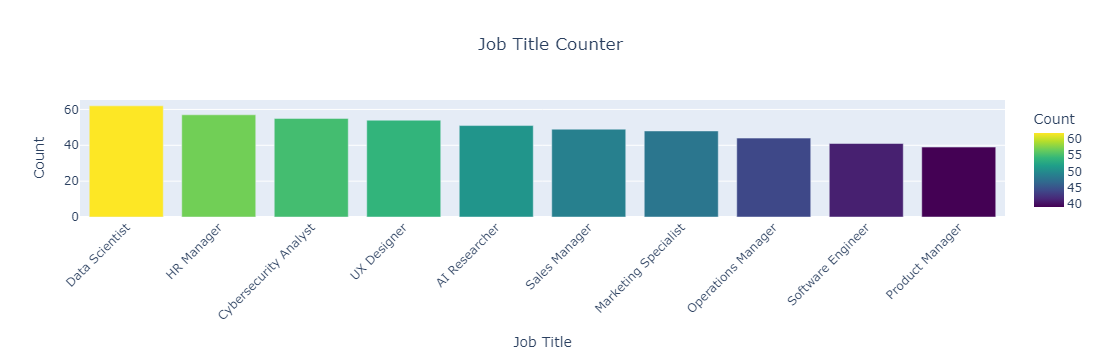

In [28]:
value_counts = job_Market['Job_Title'].value_counts().reset_index()
value_counts.columns = ['Job_Title', 'Count']
fig = px.bar(
    value_counts,
    x='Job_Title',
    y='Count',
    title='Job Title Counter',
    labels={'Count': 'Count', 'Job_Title': 'Job Title'},
    color='Count', 
    color_continuous_scale='Viridis'  
)
fig.update_layout(
    xaxis_title='Job Title',
    yaxis_title='Count',
    title_x=0.5,  
    xaxis=dict(
        tickangle=-45  
    )
)


fig.show()

The above displays a visualisation of the total Job Title count  it allows us to quickly identify the most common job titles and compare their frequencies, which can be valuable for understanding the composition of the dataset.

# Company Sizes

In [29]:
value_counts = job_Market['Company_Size'].value_counts().reset_index()
value_counts

,Company_Size,count
0,Small,171
1,Large,166
2,Medium,163


The above data is the analysis of the total count data of company sizes in the dataset

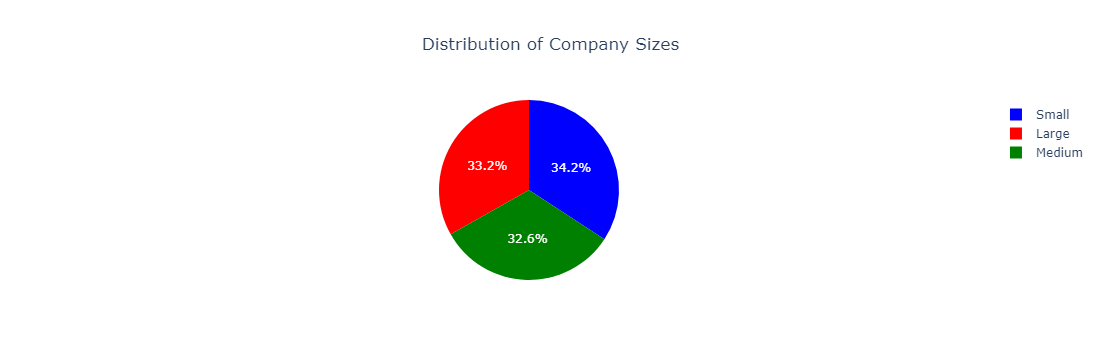

In [31]:
value_counts.columns = ['Company_Size', 'Count']

fig = px.pie(
    value_counts,
    names='Company_Size',
    values='Count',
    title='Distribution of Company Sizes',
    color='Company_Size',  # Optional: color segments by company size
    color_discrete_map={'Small': 'blue', 'Medium': 'green', 'Large': 'red'}  # Customize colors
)

fig.update_layout(
    title_x=0.5 
)

fig.show()

The above Visualisation is an Interactive Pie Chart it allows identify the percentage distribution between Small,Large and Medium companies within the  dataset this gives a clear understanding of how companie sizes are distrubuted in the dataset.

# Location

In [32]:
job_Market.Location.value_counts()

Location
San Francisco    62
Singapore        54
Sydney           52
Dubai            51
Tokyo            51
New York         49
Berlin           48
London           46
Paris            46
Toronto          41
Name: count, dtype: int64

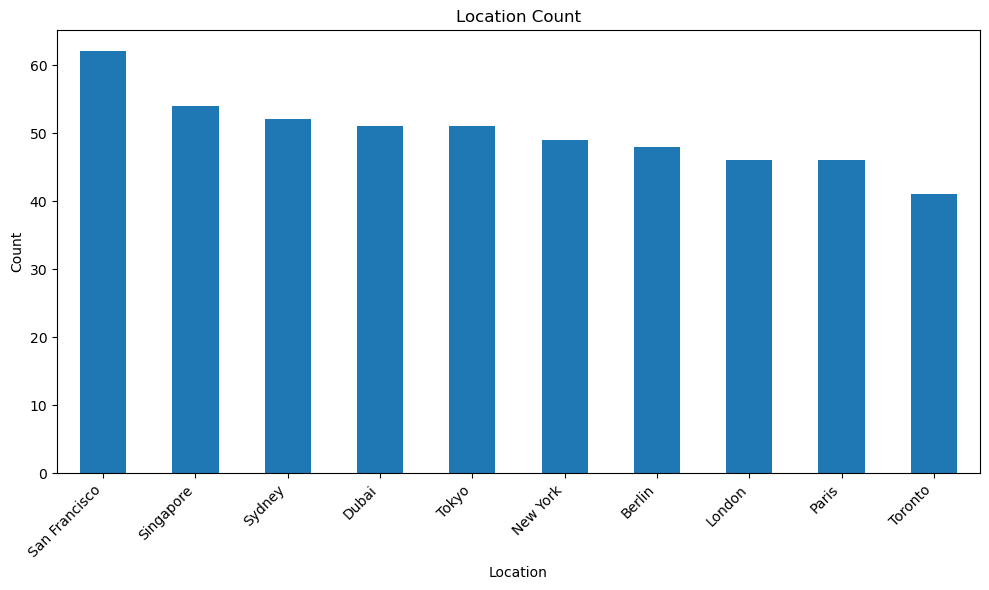

In [36]:
value_counts = job_Market['Location'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Location Count')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above Visualisation is a Bar Chart it allows us to  identify the Locations aligning them with to Job titles found within the dataset.This allows us to view how many individuals are employed in the various Locations.

# Salary 

In [38]:
#mean
mean_salary = job_Market['Salary_USD'].mean()
print('The Mean Salary in USD is:',mean_salary)

#median
median_salary = job_Market['Salary_USD'].median()
print("The Median Salary in USD is:", median_salary)

#standard deviation
std_salary = job_Market['Salary_USD'].std()
print("The Standard Deviation of Salary in USD is:", std_salary)

The Mean Salary in USD is: 91222.39097406472
The Median Salary in USD is: 91998.19528620754
The Standard Deviation of Salary in USD is: 20504.291453460664


In [41]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = job_Market['Salary_USD'].quantile(0.25)
Q3 = job_Market['Salary_USD'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_salary = job_Market['Salary_USD'].median()
job_Market.loc[(job_Market['Salary_USD'] < lower_bound) | (job_Market['Salary_USD'] > upper_bound), 'Salary_USD'] = median_salary

The above code allows the replacement of OUTLIERS with the Median

In [17]:
Salary = job_Market.sort_values(by=['Salary_USD'], ascending=[False])   #T0 SEE WHICH JOBS HAVE THE HIGHEST SALARY
print(Salary)

                 Job_Title            Industry Company_Size       Location  \
420   Marketing Specialist             Finance       Medium  San Francisco   
289         Data Scientist          Healthcare       Medium          Paris   
361            UX Designer              Energy        Small         Sydney   
341     Operations Manager       Entertainment       Medium         Berlin   
232      Software Engineer             Finance        Large      Singapore   
..                     ...                 ...          ...            ...   
431            UX Designer             Finance       Medium  San Francisco   
282        Product Manager          Healthcare        Large  San Francisco   
425            UX Designer       Entertainment        Small      Singapore   
384  Cybersecurity Analyst  Telecommunications        Large         Berlin   
182         Data Scientist      Transportation        Small       New York   

    AI_Adoption_Level Automation_Risk     Required_Skills     S

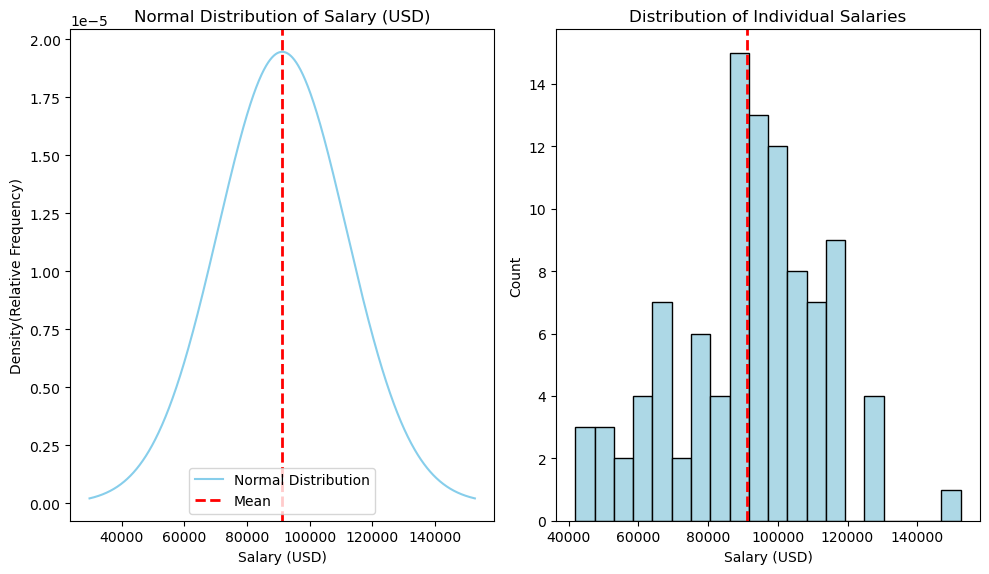

In [56]:

## Assuming you have already calculated mean_salary and std_salary
# Generate data points for the normal distribution
x = np.linspace(mean_salary - 3 * std_salary, mean_salary + 3 * std_salary, 1000)
y = norm.pdf(x, mean_salary, std_salary)

# Create a sample of individual salary values (you can replace this with your actual data)
individual_salaries = np.random.normal(mean_salary, std_salary, 100)

# Plot the normal distribution
plt.figure(figsize=(10, 6))

# Subplot 1: Normal distribution
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Normal Distribution', color='skyblue')
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Normal Distribution of Salary (USD)')
plt.xlabel('Salary (USD)')
plt.ylabel('Density(Relative Frequency)')
plt.legend()

# Subplot 2: Bar chart of individual salaries
plt.subplot(1, 2, 2)
plt.hist(individual_salaries, bins=20, color='lightblue', edgecolor='black')
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of Individual Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


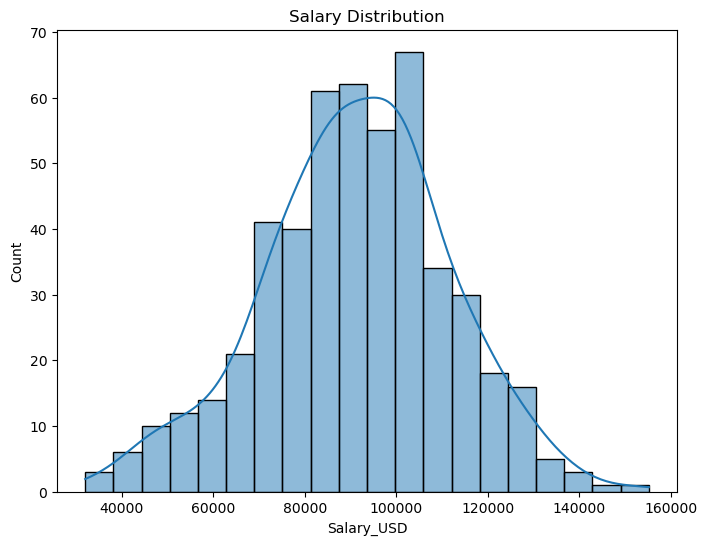

In [114]:
plt.figure(figsize=(8, 6))
sns.histplot(job_Market['Salary_USD'], kde=True)
plt.title('Salary Distribution')
plt.show()

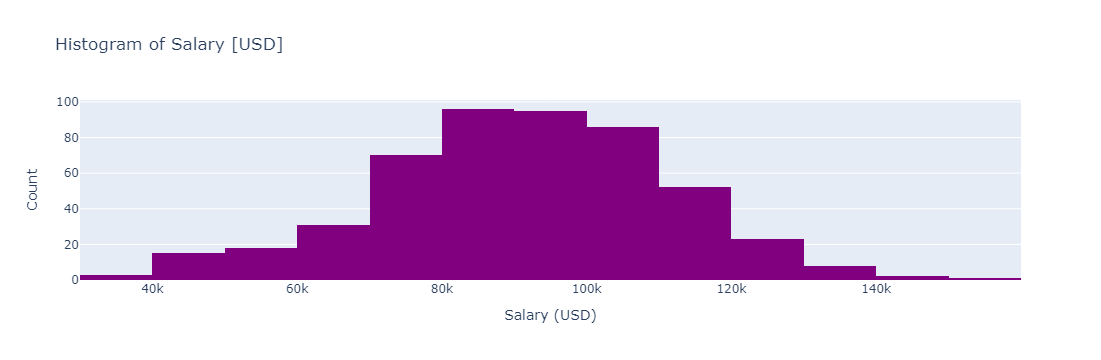

In [68]:
# Assuming you have a DataFrame called 'df' with a 'Salary_USD' column
fig = px.histogram(job_Market, x='Salary_USD', nbins=20, title='Histogram of Salary [USD]', color_discrete_sequence=['purple'])
fig.update_xaxes(title_text='Salary (USD)')
fig.update_yaxes(title_text='Count')

# Add tick labels to the x-axis
fig.update_xaxes(tickvals=[40000, 60000, 80000, 100000, 120000, 140000],ticktext=['40k', '60k', '80k', '100k', '120k', '140k'])

fig.show()

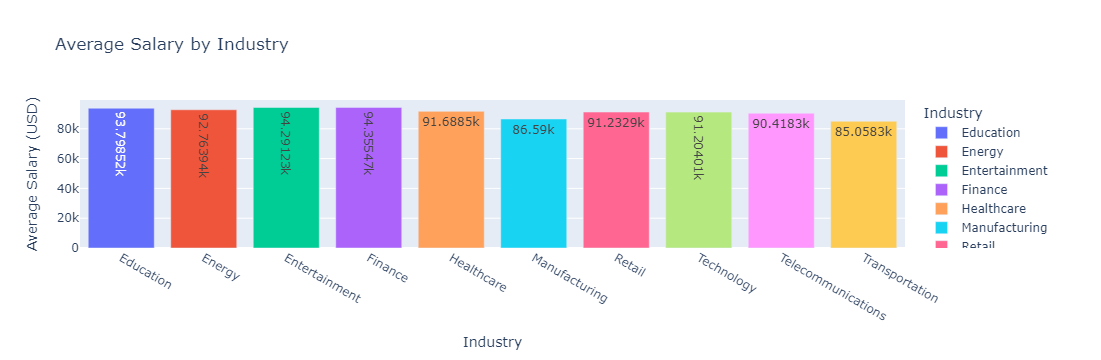

In [93]:
fig = px.bar(job_Market.groupby('Industry')['Salary_USD'].mean().reset_index(), 
              x = 'Industry', 
              y = 'Salary_USD', 
              title="Average Salary by Industry", 
              labels={'Salary_USD': 'Average Salary (USD)'},
              text_auto = True,
                color = 'Industry')
fig.show()

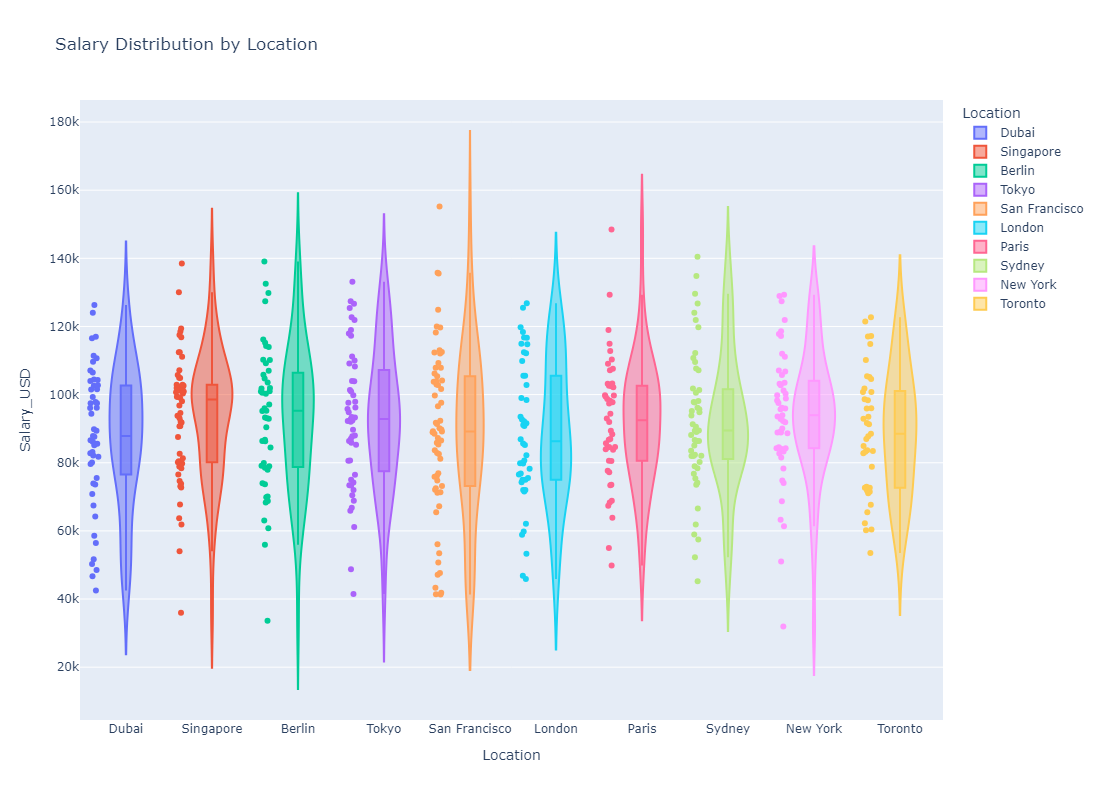

In [113]:
fig = px.violin(job_Market, 
             x = 'Location', 
             y = 'Salary_USD', 
             title = "Salary Distribution by Location",
               color = 'Location',
               box = True,
               points = 'all',
               height = 800 
)
fig.show()

# AI Adoption


In [74]:
value_counts=job_Market["AI_Adoption_Level"].value_counts()
value_counts

AI_Adoption_Level
Medium    179
Low       174
High      147
Name: count, dtype: int64

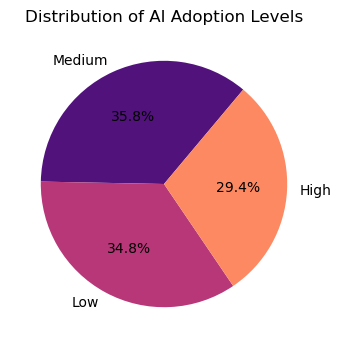

In [77]:
colors = sns.color_palette('magma', len(value_counts))
plt.figure(figsize=(4, 4))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',  
    colors=colors,  
    startangle=50  
)
plt.title('Distribution of AI Adoption Levels')
plt.show()

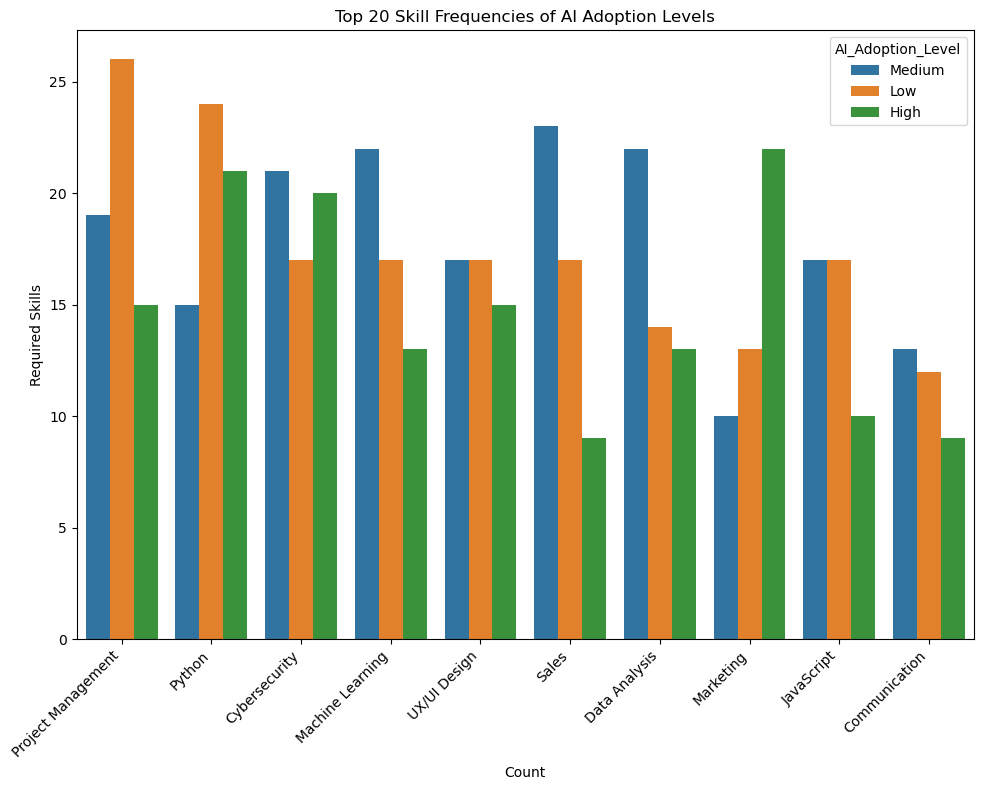

In [25]:
top_n = 20 
top_skills = job_Market['Required_Skills'].value_counts().nlargest(top_n).index
df_top = job_Market[job_Market['Required_Skills'].isin(top_skills)]

plt.figure(figsize=(10, 8))
sns.countplot(x='Required_Skills', hue='AI_Adoption_Level', data=df_top, order=top_skills)
plt.title(f"Top {top_n} Skill Frequencies of AI Adoption Levels")
plt.xlabel("Count")
plt.ylabel("Required Skills")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above visualisation displays the following : 


**Most In-Demand Skills**: Python, Data Analysis, and Machine Learning are the most frequently required skills across the dataset, indicating their central role in jobs involving AI.

**AI Adoption and Skill Frequency**: High AI adoption companies (green) require these technical skills more frequently, especially skills like Machine Learning, Python, and Data Analysis. This makes sense as these skills are crucial for developing and implementing AI systems.

**Non-Technical Skills**: Interestingly, non-technical skills like Communication and Project Management are also in demand, especially in Medium and Low AI adoption levels, suggesting that these skills are still crucial even in AI-driven industries.

**UX/UI Design**: This skill is highly demanded across all levels of AI adoption, highlighting its importance even in highly automated environments.

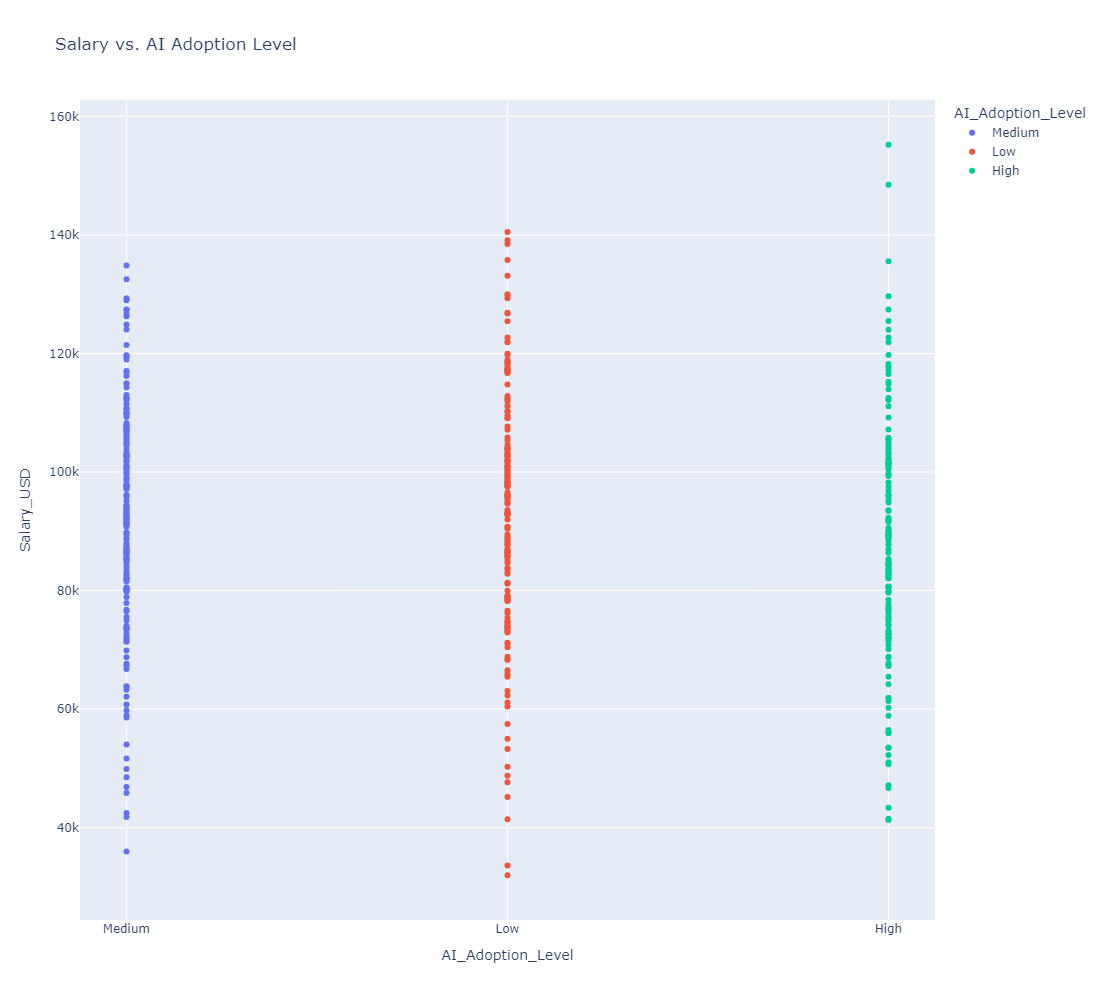

In [98]:
fig = px.scatter(job_Market, x ='AI_Adoption_Level', 
                 y = 'Salary_USD', 
                 color = 'AI_Adoption_Level', 
                 title = "Salary vs. AI Adoption Level",
                height = 1000
                )
fig.show()

The above visualisation allows the projection of AI Adpotion against with the salary this gives a summary of the different salaries paid according to the AI Adption leve


AI Adoption Level vs Remote Work Opportunity:
AI_Adoption_Level  High  Low  Medium
Remote_Friendly                     
No                   77   80      92
Yes                  70   94      87


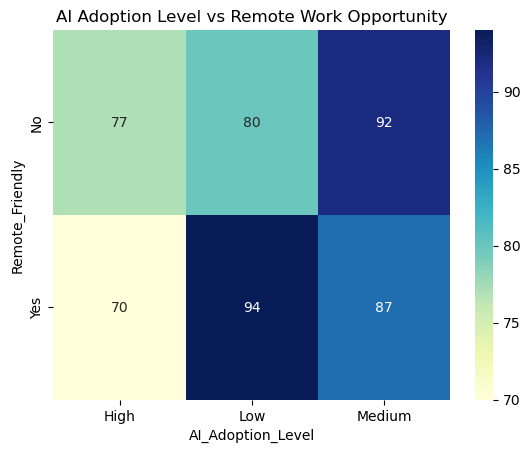

In [91]:
# 4. AI Adoption Level Impact on Remote Work
remote_ai_adoption_crosstab = pd.crosstab(job_Market['Remote_Friendly'], job_Market['AI_Adoption_Level'])
print("\nAI Adoption Level vs Remote Work Opportunity:")
print(remote_ai_adoption_crosstab)

# Visualization
sns.heatmap(remote_ai_adoption_crosstab, annot=True, cmap="YlGnBu")
plt.title("AI Adoption Level vs Remote Work Opportunity")
plt.show()

AI Adoption Level and Remote Work: The relationship between AI adoption level and remote work opportunity is inversely correlated. High AI adoption levels show a lower likelihood of jobs being remote-friendly (70), while low AI adoption levels correspond with a higher likelihood of remote-friendly jobs (94). This indicates that jobs with lower AI integration are more conducive to remote work.

Remote-Friendly Jobs:Remote-friendly jobs tend to cluster in environments with low AI adoption, with a strong presence (94). Conversely, high AI adoption jobs show less likelihood of being remote-friendly (70), suggesting that AI-driven environments may require more on-site presence.

# Remote Friendly 

In [62]:
job_Market["Remote_Friendly"].value_counts()

Remote_Friendly
Yes    251
No     249
Name: count, dtype: int64

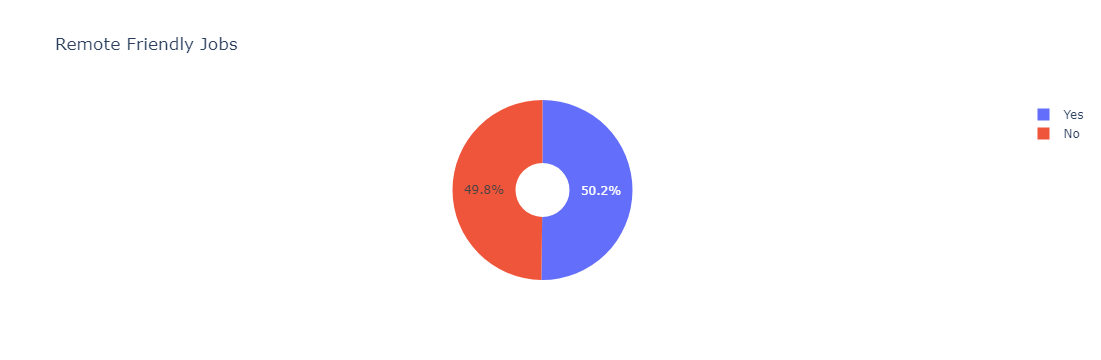

In [99]:
fig = px.pie(job_Market, 
             names = 'Remote_Friendly', 
             title = "Remote Friendly Jobs",
            hole = 0.3)
fig.show()

# Required Skill

In [69]:
value_counts = job_Market['Required_Skills'].value_counts().reset_index()
value_counts

,Required_Skills,count
0,Project Management,60
1,Python,60
2,Cybersecurity,58
3,Machine Learning,52
4,UX/UI Design,49
5,Sales,49
6,Data Analysis,49
7,Marketing,45
8,JavaScript,44
9,Communication,34


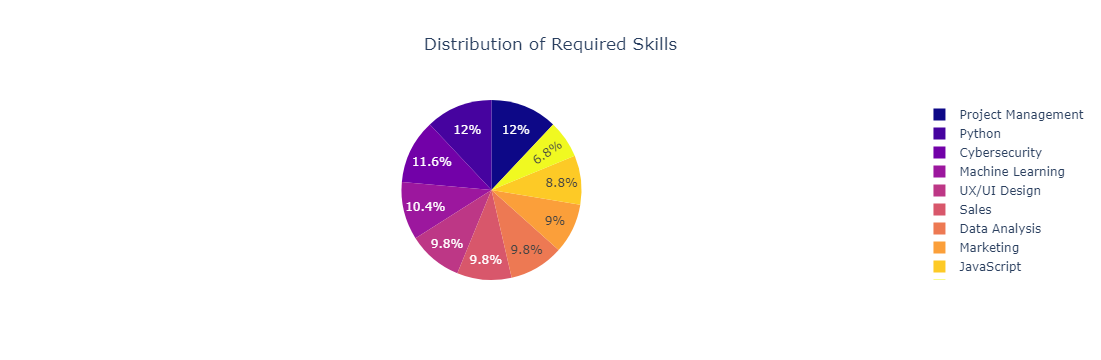

In [70]:
value_counts.columns = ['Required_Skills', 'Count']
fig = px.pie(
    value_counts,
    names='Required_Skills',
    values='Count',
    title='Distribution of Required Skills',
    color_discrete_sequence=px.colors.sequential.Plasma 
)
fig.update_layout(
    title_x=0.5 
)
fig.show()

# Industry

In [88]:
value_counts=job_Market.Industry.value_counts()
value_counts

Industry
Manufacturing         58
Education             57
Technology            56
Finance               53
Telecommunications    53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

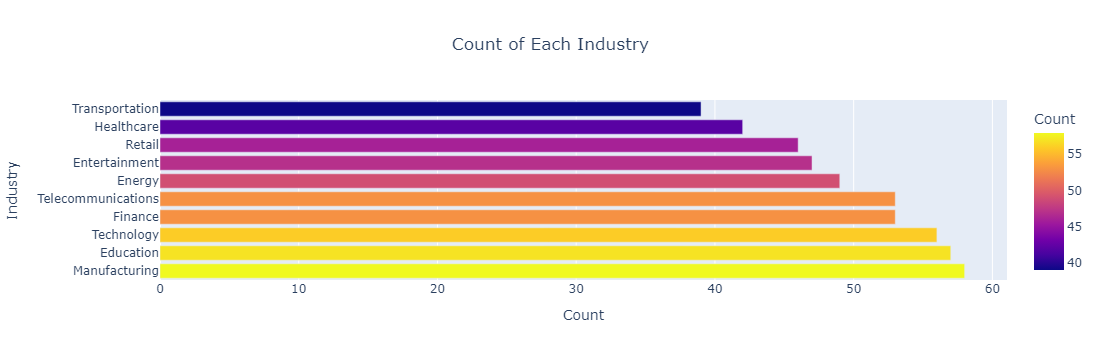

In [86]:
value_counts = value_counts.reset_index()
value_counts.columns = ['Industry', 'Count']

fig = px.bar(
    value_counts,
    y='Industry',
    x='Count',
    title='Count of Each Industry',
    labels={'Count': 'Count', 'Industry': 'Industry'},
    color='Count', 
    color_continuous_scale='Plasma'  
)

fig.update_layout(
    xaxis_title='Count',
    yaxis_title='Industry',
    title_x=0.5,  # Center the title
    yaxis=dict(
        tickangle=0  
    )
)

fig.show()

# Automation Risk


In [101]:
value_counts=job_Market.Automation_Risk.value_counts()
value_counts

Automation_Risk
Medium    173
High      169
Low       158
Name: count, dtype: int64

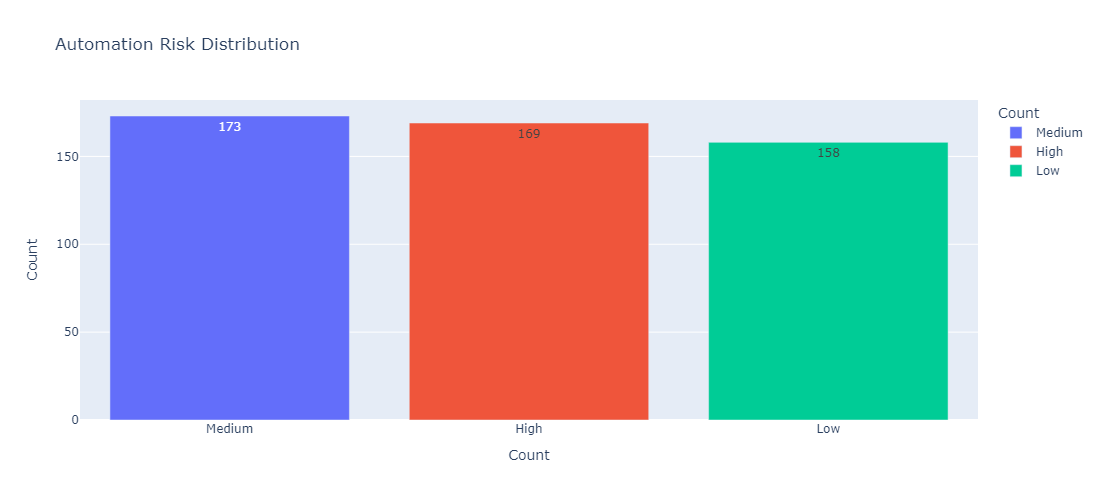

In [108]:
automation_risk = job_Market['Automation_Risk'].value_counts().reset_index()
automation_risk.columns = ['Automation_Risk','Count']
fig = px.bar(automation_risk, 
              x = 'Automation_Risk', 
              y = 'Count',
              title = "Automation Risk Distribution", 
              labels = {'Automation_Risk': 'Automation Risk', 'Automation_Risk': 'Count'},
            text_auto = True,
            color = 'Automation_Risk',
             height = 500
            )
fig.show()

# Job Growth Projection

In [102]:
value_counts=job_Market.Job_Growth_Projection.value_counts()
value_counts

Job_Growth_Projection
Growth     169
Decline    169
Stable     162
Name: count, dtype: int64

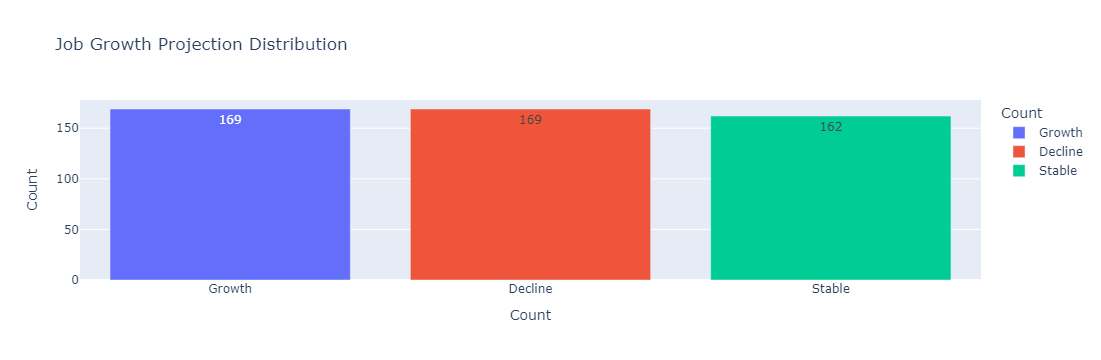

In [107]:
growth_projection = job_Market['Job_Growth_Projection'].value_counts().reset_index()
growth_projection.columns =['Job_Growth_Projection','Count']
fig = px.bar(growth_projection, 
              x = 'Job_Growth_Projection', y = 'Count', 
              title = "Job Growth Projection Distribution", 
              labels = {'Job_Growth_Projection': 'Job Growth Projection', 'Job_Growth_Projection': 'Count'},
            text_auto = True,
            color = 'Job_Growth_Projection',
             height = 500
            )
fig.show()